In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Чтение данных
data = pd.read_csv('Tempering data for carbon and low alloy steels - Raiipa.csv')

In [3]:
#Создание рабочей копии данных
data_clean = data.copy()

In [4]:
# Перевод времени в минуты
data_clean['Tempering_time_min'] = data_clean['Tempering time (s)'] / 60

In [5]:
# Удаление строк с пропущенными значениями в целевой переменной
model_data = data_clean.dropna(subset=['Final hardness (HRC) - post tempering'])

In [6]:
# Признаки для модели
features = ['Tempering temperature (ºC)', 'Tempering_time_min', 'C (%wt)', 'Mn (%wt)', 'Si (%wt)', 'Ni (%wt)', 'Cr (%wt)', 'Mo (%wt)']

In [7]:
# Целевая переменная
target = 'Final hardness (HRC) - post tempering'

In [8]:
# Заполнение пропущенных значений медианой
for feature in features:
    if model_data[feature].isnull().any():
        model_data[feature] = model_data[feature].fillna(model_data[feature].median())

In [9]:
x = model_data[features]
y = model_data[target]
print(f"Размер x: {x.shape}")
print(f"Размер y: {y.shape}")

Размер x: (1466, 8)
Размер y: (1466,)


In [10]:
# Тренировочные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Тренировочные данные: {x_train.shape}")
print(f"Тестовые данные: {x_test.shape}")

Тренировочные данные: (1172, 8)
Тестовые данные: (294, 8)


In [11]:
# Масштабирование данных
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# Простая линейная регрессия
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train_scaled, y_train)
# Предсказания
y_train_pred_lr = lr_model.predict(x_train_scaled)
y_test_pred_lr = lr_model.predict(x_test_scaled)
# Оценка модели
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
print(f"R² на тренировочных данных: {train_r2_lr:.4f}")
print(f"R² на тестовых данных: {test_r2_lr:.4f}")
print(f"RMSE на тренировочных данных: {train_rmse_lr:.4f}")
print(f"RMSE на тестовых данных: {test_rmse_lr:.4f}")

R² на тренировочных данных: 0.8893
R² на тестовых данных: 0.8502
RMSE на тренировочных данных: 4.6435
RMSE на тестовых данных: 5.5977


In [19]:
# Нейронная сеть MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=10000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
)
mlp.fit(x_train_scaled, y_train)
# Предсказания
y_train_pred_mlp = mlp.predict(x_train_scaled)
y_test_pred_mlp = mlp.predict(x_test_scaled)
# Оценка модели
train_r2_mlp = r2_score(y_train, y_train_pred_mlp)
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)
train_rmse_mlp = np.sqrt(mean_squared_error(y_train, y_train_pred_mlp))
test_rmse_mlp = np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))
print(f"Результаты обучения MLP:")
print(f"R² на тренировочных данных: {train_r2_mlp:.4f}")
print(f"R² на тестовых данных: {test_r2_mlp:.4f}")
print(f"RMSE на тренировочных данных: {train_rmse_mlp:.4f}")
print(f"RMSE на тестовых данных: {test_rmse_mlp:.4f}")

Результаты обучения MLP:
R² на тренировочных данных: 0.9528
R² на тестовых данных: 0.9274
RMSE на тренировочных данных: 3.0304
RMSE на тестовых данных: 3.8977


In [14]:
# Таблица сравнения моделей
comparison_df = pd.DataFrame({
    'Модель': ['Линейная регрессия', 'MLP'],
    'R² (тренировка)': [train_r2_lr, train_r2_mlp],
    'R² (тест)': [test_r2_lr, test_r2_mlp],
    'RMSE (тренировка)': [train_rmse_lr, train_rmse_mlp],
    'RMSE (тест)': [test_rmse_lr, test_rmse_mlp],
})
print(comparison_df.to_string(index=False))
# Определение лучшей модели
if test_r2_mlp > test_r2_lr:
    best_model = 'MLP'
    best_r2 = test_r2_mlp
    best_rmse = test_rmse_mlp
else:
    best_model = 'Линейная регрессия'
    best_r2 = test_r2_lr
    best_rmse = test_rmse_lr
print(f"\nЛучшая модель: {best_model}")
print(f"R² на тестовых данных: {best_r2:.4f}")
print(f"RMSE на тестовых данных: {best_rmse:.4f} HRC")

            Модель  R² (тренировка)  R² (тест)  RMSE (тренировка)  RMSE (тест)
Линейная регрессия         0.889253   0.850192           4.643523     5.597686
               MLP         0.954684   0.926595           2.970349     3.918342

Лучшая модель: MLP
R² на тестовых данных: 0.9266
RMSE на тестовых данных: 3.9183 HRC


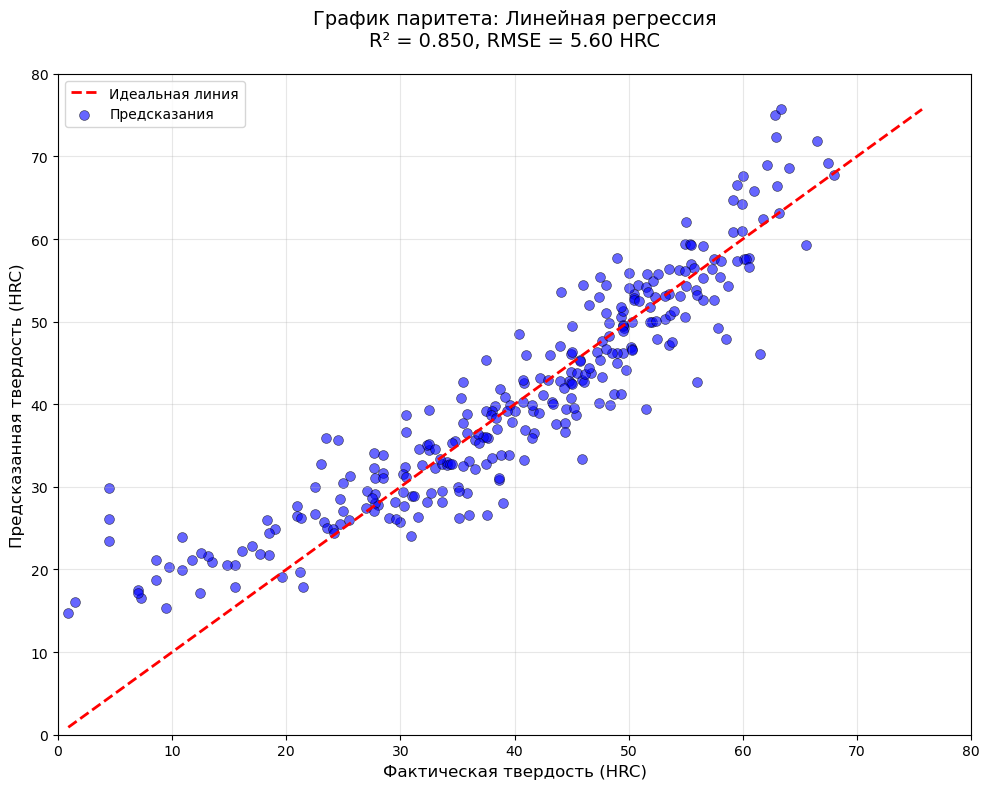

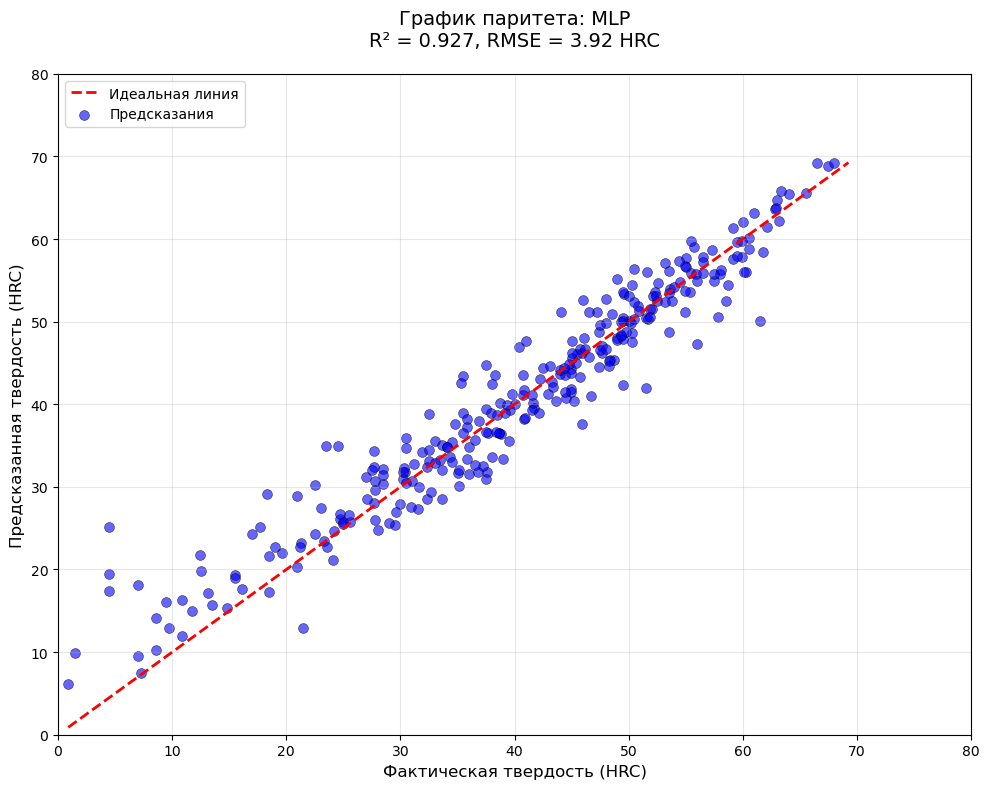

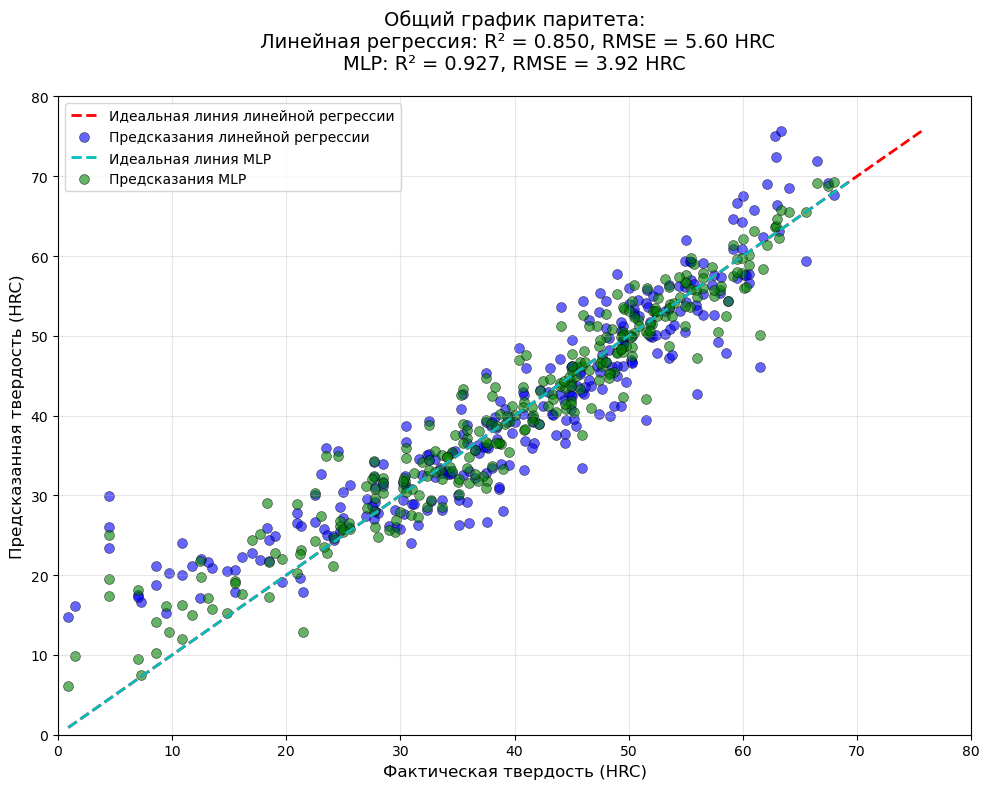

In [15]:
#Графики паритета
#Линейная регрессия
plt.figure(figsize=(10, 8))
# Расчет идеальной линии
min_val = min(y_test.min(), y_test_pred_lr.min())
max_val = max(y_test.max(), y_test_pred_lr.max())
ideal_line = np.linspace(min_val, max_val, 100)
plt.plot(ideal_line, ideal_line, 'r--', lw=2, label='Идеальная линия')
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue', label='Предсказания')
plt.xlabel('Фактическая твердость (HRC)', fontsize=12)
plt.ylabel('Предсказанная твердость (HRC)', fontsize=12)
plt.title('График паритета: Линейная регрессия\n' f'R² = {test_r2_lr:.3f}, RMSE = {test_rmse_lr:.2f} HRC', fontsize=14, pad=20)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#MLP
plt.figure(figsize=(10, 8))
# Расчет идеальной линии
min_val = min(y_test.min(), y_test_pred_mlp.min())
max_val = max(y_test.max(), y_test_pred_mlp.max())
ideal_line = np.linspace(min_val, max_val, 100)
plt.plot(ideal_line, ideal_line, 'r--', lw=2, label='Идеальная линия')
plt.scatter(y_test, y_test_pred_mlp, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue', label='Предсказания')
plt.xlabel('Фактическая твердость (HRC)', fontsize=12)
plt.ylabel('Предсказанная твердость (HRC)', fontsize=12)
plt.title('График паритета: MLP\n' f'R² = {test_r2_mlp:.3f}, RMSE = {test_rmse_mlp:.2f} HRC', fontsize=14, pad=20)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#Общий график
plt.figure(figsize=(10, 8))
# Расчет идеальной линии
min_val = min(y_test.min(), y_test_pred_lr.min())
max_val = max(y_test.max(), y_test_pred_lr.max())
ideal_line = np.linspace(min_val, max_val, 100)
plt.plot(ideal_line, ideal_line, 'r--', lw=2, label='Идеальная линия линейной регрессии')
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue', label='Предсказания линейной регрессии')
min_val = min(y_test.min(), y_test_pred_mlp.min())
max_val = max(y_test.max(), y_test_pred_mlp.max())
ideal_line = np.linspace(min_val, max_val, 100)
plt.plot(ideal_line, ideal_line, 'c--', lw=2, label='Идеальная линия MLP')
plt.scatter(y_test, y_test_pred_mlp, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='green', label='Предсказания MLP')
plt.xlabel('Фактическая твердость (HRC)', fontsize=12)
plt.ylabel('Предсказанная твердость (HRC)', fontsize=12)
plt.title('Общий график паритета:\n Линейная регрессия: ' f'R² = {test_r2_lr:.3f}, RMSE = {test_rmse_lr:.2f} HRC\n' 'MLP: ' f'R² = {test_r2_mlp:.3f}, RMSE = {test_rmse_mlp:.2f} HRC', fontsize=14, pad=20)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()